In [1]:
# Install necessary packages
install.packages("caret")
install.packages("randomForest")
install.packages("e1071")
install.packages("nnet")

# Load the libraries
library(caret)
library(randomForest)
library(e1071)
library(nnet)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




[1] 0

[1] 0

# weights:  304
initial  value 3227.280188 
iter  10 value 1811.969594
iter  20 value 1688.404409
iter  30 value 1626.905500
iter  40 value 1560.833987
iter  50 value 1508.349760
iter  60 value 1470.227174
iter  70 value 1413.040769
iter  80 value 1364.228224
iter  90 value 1344.528565
iter 100 value 1321.689293
iter 110 value 1305.989521
iter 120 value 1296.620821
iter 130 value 1289.080835
iter 140 value 1284.382432
iter 150 value 1279.096509
iter 160 value 1274.310002
iter 170 value 1273.487379
iter 180 value 1271.728394
iter 190 value 1269.524039
iter 200 value 1263.583122
final  value 1263.583122 
stopped after 200 iterations
           Model  Accuracy
1  Random Forest 0.7192982
2            SVM 0.7218045
3 Neural Network 0.6466165
mtry = 5  OOB error = 28.42% 
Searching left ...
mtry = 4 	OOB error = 30.54% 
-0.07472527 0.01 
Searching right ...
mtry = 7 	OOB error = 27.8% 
0.02197802 0.01 
mtry = 10 	OOB error = 27.55% 
0.008988764 0.01 
    MeanDecreaseGini
X1         26.891406

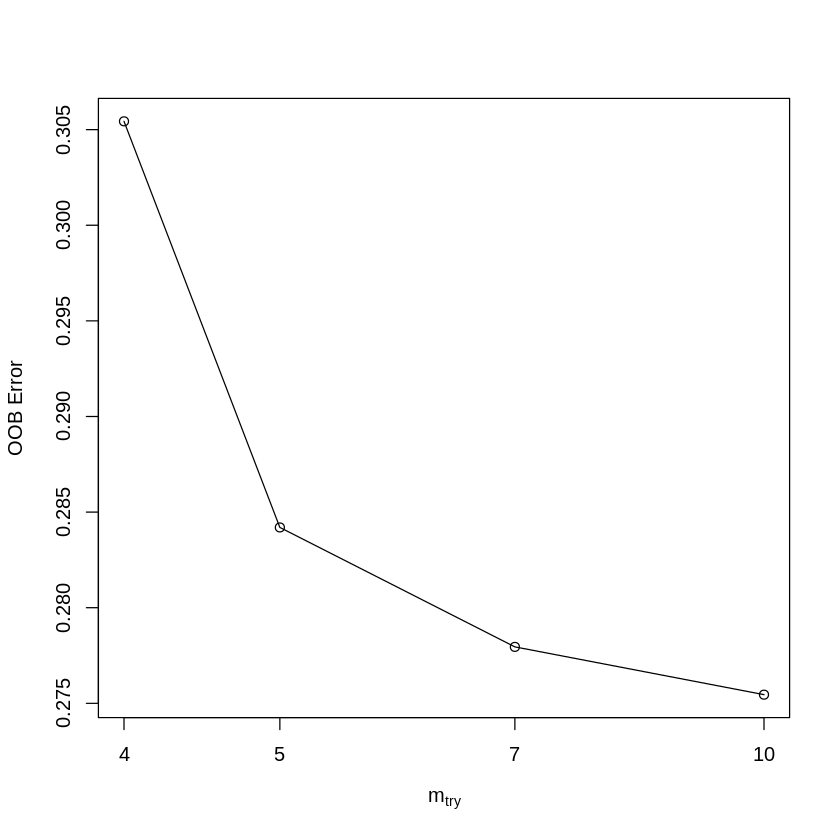

In [15]:

# Load the libraries
library(caret)
library(randomForest)
library(e1071)
library(nnet)

# Load the datasets
train_data <- read.csv("training_set.csv")
test_data <- read.csv("test_set.csv")

# Check for missing values
sum(is.na(train_data))
sum(is.na(test_data))

# Convert the response variable to factor (if not already)
train_data$Y <- as.factor(train_data$Y)

# Split the training data into a training set and a validation set
set.seed(123)
trainIndex <- createDataPartition(train_data$Y, p = .8, list = FALSE, times = 1)
trainSet <- train_data[trainIndex,]
valSet <- train_data[-trainIndex,]

# Fit models
set.seed(123)
fit1 <- randomForest(Y ~ ., data=trainSet, ntree=100)
fit2 <- svm(Y ~ ., data=trainSet, kernel='radial')
fit3 <- nnet(Y ~ ., data=trainSet, size=10, maxit=200, decay=0.01)

# Ensure the levels of predicted and actual values are the same
pred1 <- predict(fit1, valSet)
pred2 <- predict(fit2, valSet)
pred3 <- predict(fit3, valSet, type = "class")

pred1 <- factor(pred1, levels = levels(valSet$Y))
pred2 <- factor(pred2, levels = levels(valSet$Y))
pred3 <- factor(pred3, levels = levels(valSet$Y))

# Evaluate models
acc1 <- confusionMatrix(pred1, valSet$Y)$overall['Accuracy']
acc2 <- confusionMatrix(pred2, valSet$Y)$overall['Accuracy']
acc3 <- confusionMatrix(pred3, valSet$Y)$overall['Accuracy']

# Compare models
accuracies <- data.frame(Model=c('Random Forest', 'SVM', 'Neural Network'), Accuracy=c(acc1, acc2, acc3))
print(accuracies)

# Tuning the Random Forest model
set.seed(123)
tuned_rf <- tuneRF(trainSet[,-ncol(trainSet)], trainSet$Y, stepFactor=1.5, improve=0.01, ntreeTry=100)
best_mtry <- tuned_rf[which.min(tuned_rf[, "OOBError"]), "mtry"]
fit1_tuned <- randomForest(Y ~ ., data=trainSet, mtry=best_mtry, ntree=100)

# Tuning the SVM model
tuned_svm <- tune(svm, Y ~ ., data=trainSet, ranges=list(cost=10^(-1:2), gamma=c(0.01, 0.1, 1)))
fit2_tuned <- tuned_svm$best.model

# Assume Random Forest was the best model after evaluation and tuning
final_model <- fit1_tuned

# Predict on the test set
test_predictions <- predict(final_model, test_data)

# Ensure the predictions are factors with the same levels as the training data response variable
test_predictions <- factor(test_predictions, levels = levels(train_data$Y))

# Save predictions to a CSV file
write.csv(test_predictions, "predictions.csv", row.names=FALSE)

# Identify important variables
important_vars <- importance(fit1_tuned)
print(important_vars)
